<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/65_Day_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
from sklearn.datasets import make_classification

In [213]:
X,y = make_classification(n_samples=1000,n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1,random_state=1)

In [214]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
df.head()

,col1,col2,col3,col4,col5,target
0,-0.246427,0.791251,1.592397,-1.053263,0.712825,0
1,1.919836,2.888159,2.423030,-1.450141,3.669697,0
2,-0.670832,1.422966,1.317835,0.660128,1.582244,0
3,-2.698730,-1.090890,-1.726012,-3.349289,1.117709,1
4,0.620849,3.498071,0.324236,1.591744,0.945621,0


In [215]:
# function for row sampling
def row_sample(df,n):
    return df.sample(int(n*df.shape[0]),replace=True)

In [216]:
# function for col sampling

def col_sample(df,n):
    new_df=df.drop(columns='target')
    new_df=new_df.sample(int(n*(new_df.shape[1]-1)),axis=1)
    new_df['target']=df['target']
    return new_df


In [217]:
# combined sampling

def combined_sample(df,n1,n2):
    df1=row_sample(df,n1)
    df2=col_sample(df1,n2)
    return df2

In [218]:
df1=row_sample(df,0.1)
df2=row_sample(df,0.1)
df3=row_sample(df,0.1)

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [220]:
clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

In [221]:
from sklearn.tree import plot_tree



[Text(0.36666666666666664, 0.9166666666666666, 'x[2] <= 0.173\ngini = 0.497\nsamples = 100\nvalue = [46, 54]'),
 Text(0.13333333333333333, 0.75, 'x[3] <= 1.513\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.25, 0.8333333333333333, 'True  '),
 Text(0.06666666666666667, 0.5833333333333334, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.2, 0.5833333333333334, 'x[0] <= 0.54\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.13333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.26666666666666666, 0.4166666666666667, 'x[3] <= 1.641\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.75, 'x[1] <= 2.337\ngini = 0.346\nsamples = 54\nvalue = [42, 12]'),
 Text(0.4833333333333333, 0.8333333333333333, '  False'),
 Text(0.4666666666666667, 0.5833333333333334, 'x[3] <= -1.429\ngini = 0.05\nsamples = 39\nv

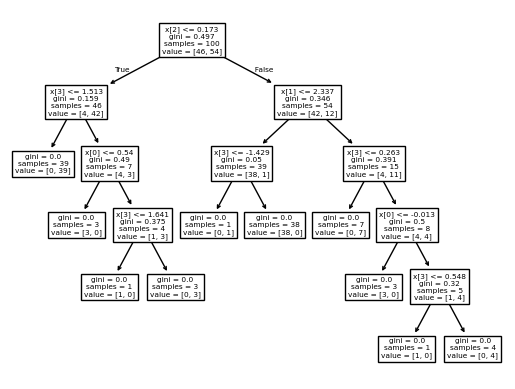

In [222]:
plot_tree(clf1)

[Text(0.4125, 0.9166666666666666, 'x[2] <= -0.204\ngini = 0.476\nsamples = 100\nvalue = [61, 39]'),
 Text(0.15, 0.75, 'x[3] <= 1.488\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(0.28125, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'x[4] <= 2.396\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.05, 0.4166666666666667, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.15, 0.4166666666666667, 'x[1] <= 0.154\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.675, 0.75, 'x[1] <= 2.157\ngini = 0.306\nsamples = 69\nvalue = [56, 13]'),
 Text(0.54375, 0.8333333333333333, '  False'),
 Text(0.45, 0.5833333333333334, 'x[3] <= -1.202\ngini = 0.171\nsamples = 53\nvalue = [48, 5]'),
 Text(0.35, 0.4166666666666667, 'x[2] <= 1.916\ngini = 0.444\nsamples = 6\nvalue = [2

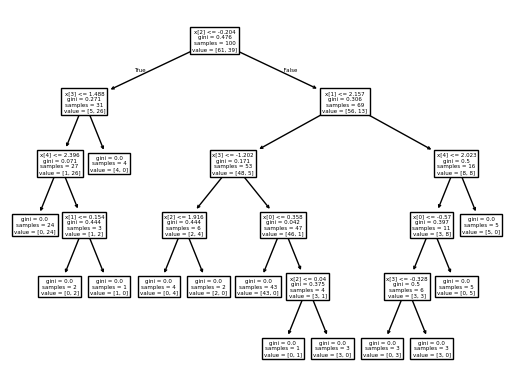

In [223]:
plot_tree(clf2)

[Text(0.3392857142857143, 0.9, 'x[2] <= -0.338\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.14285714285714285, 0.7, 'x[3] <= 2.247\ngini = 0.18\nsamples = 40\nvalue = [4, 36]'),
 Text(0.24107142857142858, 0.8, 'True  '),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.21428571428571427, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5357142857142857, 0.7, 'x[1] <= 1.822\ngini = 0.375\nsamples = 60\nvalue = [45, 15]'),
 Text(0.4375, 0.8, '  False'),
 Text(0.35714285714285715, 0.5, 'x[3] <= -1.185\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.2857142857142857, 0.3, 'x[0] <= -1.36\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.35714285714285715, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.7142857142857143, 0.5, 'x[0] <= -0.704\ngini = 0.499\nsamples 

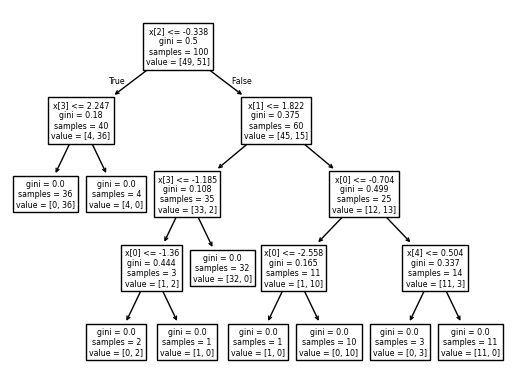

In [224]:
plot_tree(clf3)

In [225]:
df1

,col1,col2,col3,col4,col5,target
421,-0.820479,-0.302527,-2.637388,-1.808512,0.166178,1
44,-0.144046,1.591487,-0.541922,1.440056,2.721296,1
313,-1.234213,4.012838,2.210073,-0.255008,-1.505139,1
229,0.059085,1.797112,-0.605138,0.283047,0.136136,1
405,-1.057284,-0.475413,-2.455087,-2.267575,1.280532,1
...,...,...,...,...,...,...
548,-1.332468,1.107459,-1.528574,-1.413597,0.846444,1
409,1.059083,3.505781,0.684551,1.219329,0.060135,1
138,1.088236,0.906438,-1.466274,0.319207,-0.437442,1
460,-2.101705,0.709857,1.456963,0.040560,-0.867223,0


In [226]:
clf1.predict(np.array([0.491677,	1.553522,	-0.451589,	-0.220498,	-0.836666]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [227]:
clf2.predict(np.array([0.491677,	1.553522,	-0.451589,	-0.220498,	-0.836666]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [228]:
clf3.predict(np.array([0.491677,	1.553522,	-0.451589,	-0.220498,	-0.836666]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# column sampling

In [229]:
df1=col_sample(df,0.8)
df2=col_sample(df,0.8)
df3=col_sample(df,0.8)

In [230]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [231]:
clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

In [232]:
df3

,col1,col5,col4,target
0,-0.246427,0.712825,-1.053263,0
1,1.919836,3.669697,-1.450141,0
2,-0.670832,1.582244,0.660128,0
3,-2.698730,1.117709,-3.349289,1
4,0.620849,0.945621,1.591744,0
...,...,...,...,...
995,-1.739342,1.473572,-1.824001,1
996,-1.048157,1.771027,-0.862428,1
997,0.007792,1.192712,0.593560,0
998,0.260633,-0.634300,-0.355781,1


In [233]:
clf1.predict(np.array([-1.053263,	0.791251,	1.592397,	]).reshape(1,3))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [234]:
clf2.predict(np.array([-1.053263,	0.791251,	1.592397,	]).reshape(1,3))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [235]:
clf3.predict(np.array([-1.053263,	0.791251,	1.592397,	]).reshape(1,3))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# combined sampling

In [236]:
df1=combined_sample(df,0.8,0.8)
df2=combined_sample(df,0.8,0.8)
df3=combined_sample(df,0.8,0.8)

In [237]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [238]:
clf1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

In [239]:
df3

,col4,col5,col1,target
134,-0.140369,1.258702,-0.931368,1
899,-2.220051,1.297720,-0.846315,1
67,1.819925,-0.044693,-2.378876,0
678,-0.194824,0.776864,-0.620544,1
151,-0.074527,-0.192583,-1.495951,0
...,...,...,...,...
555,0.200189,-0.932908,-3.894188,0
38,-1.748296,-0.533955,-0.244774,1
556,-1.159532,2.514053,-2.846253,1
289,-2.164607,-1.027743,-0.668121,1


In [240]:
print("1= ", clf1.predict(np.array([	0.597334,	0.529574,	-4.936486]).reshape(1,3)))
print("2= ", clf2.predict(np.array([	0.597334,	0.529574,	-4.936486]).reshape(1,3)))
print("3= ", clf3.predict(np.array([	0.597334,	0.529574,	-4.936486]).reshape(1,3)))

1=  [1]
2=  [1]
3=  [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
